<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/EDA_V0_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E12 - Insurance Premium Prediction Dataset**

## Problem Statement

The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

## Dataset Overview

This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

### Features

1. Age: Age of the insured individual (Numerical)
2. Gender: Gender of the insured individual (Categorical: Male, Female)
3. Annual Income: Annual income of the insured individual (Numerical, skewed)
4. Marital Status: Marital status of the insured individual (Categorical: Single, Married, Divorced)
5. Number of Dependents: Number of dependents (Numerical, with missing values)
6. Education Level: Highest education level attained (Categorical: High School, Bachelor's, Master's, PhD)
7. Occupation: Occupation of the insured individual (Categorical: Employed, Self-Employed, Unemployed)
8. Health Score: A score representing the health status (Numerical, skewed)
9. Location: Type of location (Categorical: Urban, Suburban, Rural)
10. Policy Type: Type of insurance policy (Categorical: Basic, Comprehensive, Premium)
11. Previous Claims: Number of previous claims made (Numerical, with outliers)
12. Vehicle Age: Age of the vehicle insured (Numerical)
13. Credit Score: Credit score of the insured individual (Numerical, with missing values)
14. Insurance Duration: Duration of the insurance policy (Numerical, in years)
15. Premium Amount: Target variable representing the insurance premium amount (Numerical, skewed)
16. Policy Start Date: Start date of the insurance policy (Text, improperly formatted)
17. Customer Feedback: Short feedback comments from customers (Text)
18. Smoking Status: Smoking status of the insured individual (Categorical: Yes, No)
19. Exercise Frequency: Frequency of exercise (Categorical: Daily, Weekly, Monthly, Rarely)
20. Property Type: Type of property owned (Categorical: House, Apartment, Condo)

# Data Characteristics

- Missing Values: Certain features contain missing values to simulate real-world data collection issues.
- Incorrect Data Types: Some fields are intentionally set to incorrect data types to practice data cleaning.
- Skewed Distributions: Numerical features like **Annual Income** and **Premium Amount** have skewed distributions, which can be addressed through transformations.

In [ ]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
!pip install optuna-integration-pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

!pip install category-encoders
!pip install optuna-integration

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!pip install skops

from pytorch_tabnet.tab_model import TabNetRegressor

In [ ]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

<Figure size 960x660 with 0 Axes>

In [ ]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

<Figure size 960x660 with 0 Axes>

In [ ]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [ ]:
df_train = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/train.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_test = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/test.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/sample_submission.csv",
     index_col='id',
)

df_orig = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
     parse_dates=['Policy Start Date'],
    #     index_col='id',
)

In [ ]:
df_train.shape, df_test.shape, df_subm.shape, df_orig.shape, df_orig.shape

((1200000, 20), (800000, 19), (800000, 1), (278860, 20), (278860, 20))

In [ ]:
print("Pytorch Version: {}".format(torch.__version__))
print("SKLearn Version: {}".format(sklearn.__version__))

Pytorch Version: 2.5.1+cu121
SKLearn Version: 1.5.2


In [ ]:
100*df_orig.isnull().sum()/df_orig.shape[0]

,0
Age,1.680055
Gender,0.000000
Annual Income,5.004303
Marital Status,1.799828
Number of Dependents,10.000000
Education Level,0.000000
Occupation,29.150111
Health Score,3.800115
Location,0.000000
Policy Type,0.000000


In [ ]:
100*df_train.isnull().sum()/df_train.shape[0]

,0
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000
Policy Type,0.000000


In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims']
time_cols = ['Policy Start Date']
target = ['Premium Amount']

len(categorical_cols+numerical_cols+target+time_cols),len(df_train.columns)

(20, 20)

## BASELINE MODELS:

In [ ]:
#df_train.info()

In [ ]:
df = pd.concat([df_train, df_test], axis=0)

# Convert `Policy Start Date` column to datetime64 format
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

# Calculate the difference in days between today and the `Policy Start Date` column
today = pd.to_datetime('today')
difference_in_days = today - df['Policy Start Date']

# Divide the difference in days by 365 to get the difference in years
difference_in_years = difference_in_days / pd.Timedelta(days=365)

# Convert the `Policy Start Date` column to the number of years since the policy start date
df['Policy Start Date'] = difference_in_years

numerical_cols = numerical_cols+time_cols

In [ ]:
df_train = df.iloc[:df_train.shape[0], :]
df_test = df.iloc[df_train.shape[0]:, :]

df_train.shape, df_test.shape

((1200000, 20), (800000, 20))

In [ ]:
df_train.head(3)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,0.965278,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1.496785,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,1.195415,Good,Yes,Weekly,House,567.0


In [ ]:
# Imputers for missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# Encoder for categorical features
encoder = OrdinalEncoder()

# ColumnTransformer for imputing missing values
imputer = ColumnTransformer(
    transformers=[
        ('categorical', categorical_imputer, categorical_cols),
        ('numerical', numerical_imputer, numerical_cols)
                  ],remainder='passthrough')

# Pipeline
pipeline = Pipeline([
    ('imputer', imputer)
])


In [ ]:
train_df = pd.DataFrame(data=pipeline.fit_transform(df_train), columns=categorical_cols+numerical_cols+target)
test_df = pd.DataFrame(data=pipeline.transform(df_test), columns=categorical_cols+numerical_cols+target)

train_df[numerical_cols+target] = train_df[numerical_cols+target].astype(float)
test_df[numerical_cols+target] = test_df[numerical_cols+target].astype(float)

In [ ]:
#train_df.isnull().sum()/train_df.shape[0]
gc.collect()

235

In [ ]:
#test_df.isnull().sum()/test_df.shape[0]

In [ ]:
# Initialize a dictionary to keep track of label encoders
label_encoders = {}

# Loop through each categorical column and label encode
for col in categorical_cols:
    le = LabelEncoder()
    # Combine data to fit on both train and test to handle unseen categories
    combined_data = pd.concat([train_df[[col]], test_df[[col]]], axis=0)
    le.fit(combined_data)
    train_df[col] = le.transform(train_df[[col]])
    test_df[col] = le.transform(test_df[[col]])
    label_encoders[col] = le  # Save the encoder for future use if needed

In [ ]:
train_df.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Age,Annual Income,Health Score,Number of Dependents,Vehicle Age,Credit Score,Insurance Duration,Previous Claims,Policy Start Date,Premium Amount
0,0,1,0,1,2,2,2,0,3,2,19.0,10049.0,22.598761,1.0,17.0,372.0,5.0,2.0,0.965278,2869.0
1,0,0,2,0,0,1,0,1,1,2,39.0,31678.0,15.569731,3.0,12.0,694.0,2.0,1.0,1.496785,1483.0
2,1,0,1,1,1,2,1,1,3,2,23.0,25602.0,47.177549,3.0,14.0,595.0,3.0,1.0,1.195415,567.0
3,1,1,0,0,0,0,2,1,0,0,21.0,141855.0,10.938144,2.0,0.0,367.0,1.0,1.0,0.494045,765.0
4,1,2,0,1,0,2,2,1,3,2,21.0,39651.0,20.376094,1.0,8.0,598.0,4.0,0.0,3.025552,2022.0


In [ ]:
#print(train_df.head().to_markdown(index=False, numalign="left", stralign="left"))
df_subm.head()

,Premium Amount
id,
1200000,1102.545
1200001,1102.545
1200002,1102.545
1200003,1102.545
1200004,1102.545


### **1.0 Stacked Model**

In [ ]:
# Define a common random seed for reproducibility
RANDOM_SEED = 42
N_ESTIMATORS = 3000  # Number of estimators for the ensemble models

X = train_df.drop(columns="Premium Amount").copy()
y = np.log(train_df["Premium Amount"].copy())

X_test = test_df.drop(columns="Premium Amount").copy()
X_test = X_test.values

df_subm_stack = df_subm.copy()

cv = KFold(5, shuffle=True, random_state=RANDOM_SEED)
rmsle = []

# Initialize the Stack
df_subm_stack['Premium Amount'] = 0.0

i=0

oof_results_stack = pd.DataFrame(columns=list(range(5)), index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train].to_numpy(), y.iloc[idx_train].to_numpy()
    X_valid, y_valid = X.iloc[idx_valid].to_numpy(), y.iloc[idx_valid].to_numpy()

    # Define base estimators with random seed and number of estimators
    estimators = [
        ('lgbm', LGBMRegressor(random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS,subsample=0.9, colsample_bytree=0.95, learning_rate=0.015)),
        ('xgb', XGBRegressor(random_state=RANDOM_SEED, n_estimators=N_ESTIMATORS, colsample_bytree = 0.95, subsample= 0.90, learning_rate=0.015)),
        ('catboost', CatBoostRegressor(random_seed=RANDOM_SEED, iterations=N_ESTIMATORS, subsample=0.9, learning_rate=0.015))
    ]

    meta_model = Ridge(alpha=0.1, positive=True)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)
    if i >= 5:
        #print(stacking_model.get_params())
        # Fit the StackingRegressor
        stacking_model.fit(X_train, y_train)
        obj = sio.dump(stacking_model, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/staked_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/staked_base_{i}.skops")
        stacking_model = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/staked_base_{i}.skops", trusted=unknown_types)


    stack_preds = np.exp(stacking_model.predict(X_valid))

    oof_results_stack.iloc[idx_valid,i] = stack_preds.flatten()
    # Prepare the test data and make predictions
    error = root_mean_squared_log_error(np.exp(y_valid), stack_preds)

    rmsle.append(error)
    print(f"RMSLE fold {i}: {error}")

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    df_subm_stack['Premium Amount'] += np.exp(stacking_model.predict(X_test)) / 5
    i += 1

Fold 0
RMSLE fold 0: 1.052410941872681
Fold 1
RMSLE fold 1: 1.0511305904924753
Fold 2
RMSLE fold 2: 1.0517762581133
Fold 3
RMSLE fold 3: 1.0499723732074164
Fold 4
RMSLE fold 4: 1.051855551705375


In [ ]:
np.mean(rmsle), np.std(rmsle)

(1.0514291430782496, 0.0008339729181012842)

In [ ]:
oof_results_stack["average"] = oof_results_stack.mean(axis=1)
oof_results_stack["average"].min(),oof_results_stack["average"].max()

(131.9267142545023, 1683.316885579223)

In [ ]:
plt.hist(oof_results_stack["average"], bins=100, alpha=0.5)
plt.hist(train_df["Premium Amount"], bins=100, color="salmon", alpha=0.5)
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Premium Amounts")
plt.show()

In [ ]:
train_df["Premium Amount"].min(),train_df["Premium Amount"].max(),train_df["Premium Amount"].mean(),train_df["Premium Amount"].median()

(20.0, 4999.0, 1102.5448216666666, 872.0)

##### Save Results:

In [ ]:
df_subm_stack.head()

,Premium Amount
id,
1200000,660.936255
1200001,808.389610
1200002,798.937480
1200003,800.620026
1200004,753.849486


In [ ]:
#df_subm_stack.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/submission_stack_baseline.csv')

In [ ]:
#oof_results_stack["average"] = oof_results_stack.mean(axis=1)
oof_results_stack.head()

In [ ]:
oof_results_stack.isna().sum()

,0
0,960000
1,960000
2,960000
3,960000
4,960000
average,0


In [ ]:
train_results_df_ = oof_results_stack["average"].astype("float").copy()
train_results_df_.columns = ["stack_baseline"]
#train_results_df_.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/train_stack_baseline.csv")

### **2.0 TabNet Regressor**

##### **Grouped Features**
It is possible to specify attention groups (using grouped_features). Attention is done at the group level and not feature level. This is especially useful if a dataset has a lot of columns coming from on single source of data

In [ ]:
train_df.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Age', 'Annual Income',
       'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Previous Claims', 'Policy Start Date',
       'Premium Amount'],
      dtype='object')

In [ ]:
grouped_features = []
feature_cols = train_df.columns.to_list()
target_col = 'Premium Amount'
feature_cols.remove(target_col)

group_person = ['Age', 'Gender', 'Marital Status', 'Education Level', 'Health Score', 'Smoking Status', 'Exercise Frequency']
group_income = ['Annual Income', 'Number of Dependents', 'Occupation', 'Credit Score', 'Property Type', 'Location']
group_policy = ['Policy Type', 'Previous Claims', 'Vehicle Age', 'Insurance Duration', 'Policy Start Date', 'Customer Feedback']

# Iterate through each set of related columns (e.g., blood glucose, insulin, etc.)
for colset in [group_person, group_income, group_policy]:
    group_idxs = [idx for idx, col in enumerate(feature_cols) if col in colset]
    grouped_features.append(group_idxs)

In [ ]:
grouped_features

[[0, 1, 2, 7, 8, 10, 12], [3, 4, 9, 11, 13, 15], [5, 6, 14, 16, 17, 18]]

##### **Training & Inference**


In [ ]:
train_df.head()

In [ ]:
X_ = train_df[feature_cols]
y = train_df[[target_col]]

In [ ]:
# X.columns

# print(feature_cols)

X_.isna().sum().sum()

0

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

In [ ]:
FOLDS = 5
RANDOM_SEED = 42
X = train_df.drop(columns="Premium Amount").copy()
y = train_df["Premium Amount"].copy()

X_test = test_df.drop(columns="Premium Amount").copy()

df_subm_tabnet = df_subm.copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
rmsle = []

# Initialize the Stack
df_subm_tabnet['Premium Amount'] = 0.0

i=0

oof_results = pd.DataFrame(columns=list(range(FOLDS)), index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    scaler = MinMaxScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])

    X_train = X_train.to_numpy()
    X_valid = X_valid.to_numpy()

    # Initialize the TabNet Regressor model
    params = {} #'n_d': 10, 'n_a': 10, 'n_steps': 3, 'gamma': 1.37, 'lambda_sparse': 0.0016
    reg = TabNetRegressor(
        grouped_features=grouped_features,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=0.01),
        scheduler_params={"patience":5, # how to use learning rate scheduler
                          "factor":0.5,
                          "min_lr":0.0001},
        scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
        **params)

    # Train the model using the training set and validate using the validation set
    if i>5:
      reg.fit(
          X_train, y_train,
          eval_set=[(X_valid, y_valid)],
          eval_metric=['rmsle'],
          batch_size=1024,
          max_epochs=100,
          patience=17
          )

      torch.save(reg, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/Tabnet_v6/tabnet_model_{i}.pth")

    else:
      reg = torch.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/Glucose/Tabnet_v6/tabnet_model_{i}.pth")

    tab_preds = reg.predict(X_valid)

    oof_results.iloc[idx_valid,i] = tab_preds.flatten()

    # Prepare the test data and make predictions
    error = root_mean_squared_log_error(y_valid, tab_preds)
    rmsle.append(error)
    print(f"RMSLE fold {i}: {error}")

    X_test_ = X_test.copy()
    X_test_[numerical_cols] = scaler.transform(X_test_[numerical_cols])
    X_test_ = X_test_.to_numpy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    df_subm_tabnet['Premium Amount'] += reg.predict(X_test_)[:, 0] / FOLDS
    i += 1

    del scaler, reg, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()


#df_subm.to_csv('submission_tabnet.csv')

Fold 0
RMSLE fold 0: 1.1478972492470383
Fold 1
RMSLE fold 1: 1.1510460788166026
Fold 2
RMSLE fold 2: 1.1449163282070463
Fold 3
RMSLE fold 3: 1.1504960346944604
Fold 4
RMSLE fold 4: 1.152191966789925


In [ ]:
rmsle

[1.1478972492470383,
 1.1510460788166026,
 1.1449163282070463,
 1.1504960346944604,
 1.152191966789925]

In [ ]:
np.mean(rmsle), np.std(rmsle)

(1.1493095315510145, 0.0026087006707983746)

In [ ]:
oof_results["average"] = oof_results.mean(axis=1)
oof_results["average"].min(),oof_results["average"].max()

(260.32696533203125, 2565.853759765625)

In [ ]:
plt.hist(oof_results["average"], bins=100, alpha=0.5)
plt.hist(train_df["Premium Amount"], bins=100, color="salmon", alpha=0.5)
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Premium Amounts")
plt.show()

In [ ]:
train_df["Premium Amount"].min(),train_df["Premium Amount"].max(),train_df["Premium Amount"].mean(),train_df["Premium Amount"].median()

(20.0, 4999.0, 1102.5448216666666, 872.0)

##### Save Results:

In [ ]:
df_subm_tabnet.head()

In [ ]:
#df_subm_tabnet.to_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/submission_tabnet_baseline.csv')

In [ ]:
#oof_results_stack["average"] = oof_results_stack.mean(axis=1)
oof_results.head()

In [ ]:
oof_results.isna().sum()

,0
0,960000
1,960000
2,960000
3,960000
4,960000
average,0


In [ ]:
train_results_df_ = oof_results["average"].astype("float").copy()
train_results_df_.columns = ["stack_baseline"]
#train_results_df_.to_csv(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Submissions/train_tabnet_baseline.csv")

### Occupation:

In [ ]:
df = pd.concat([df_train, df_test], axis=0)

occ_null = df[df['Occupation'].isnull()]

occ_null.isnull().sum()/occ_null.shape[0]

In [ ]:
occ_null[occ_null["Previous Claims"]>=8]

In [ ]:
del occ_null
gc.collect()

17863

In [ ]:
# fig, axs = plt.subplots(2,2,figsize=(12,10))
# axs = np.ravel(axs)

# sns.barplot(df, x="Previous Claims", y="Annual Income", hue="Occupation", ax=axs[0], palette=palette_9)
# sns.barplot(df, x="Previous Claims", y="Annual Income", ax=axs[1], palette=palette_9)

# sns.barplot(df, x="Previous Claims", y="Credit Score", hue="Occupation", ax=axs[2], palette=palette_9)
# sns.barplot(df, x="Previous Claims", y="Credit Score", ax=axs[3], palette=palette_9)

# plt.show()

In [ ]:
df_train.Occupation.unique()

array(['Self-Employed', nan, 'Employed', 'Unemployed'], dtype=object)

In [ ]:
grouped_means = df.groupby('Occupation').mean(numeric_only=True)
grouped_median = df.groupby('Occupation').median(numeric_only=True)
display(grouped_means)
display(grouped_median)

In [ ]:
grouped_counts = df.groupby('Occupation')[categorical_cols].count()
grouped_counts

In [ ]:
categorical_cols_no_occ = ['Gender', 'Marital Status', 'Education Level', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OneHotEncoder(sparse_output=False))
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols_no_occ)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True
)

In [ ]:
le = OrdinalEncoder(encoded_missing_value=np.nan)
df["Occupation"] = le.fit_transform(df[["Occupation"]])

In [ ]:
df["Occupation"].unique()

array([ 1., nan,  0.,  2.])

In [ ]:
df[df.Occupation.isna()==True]

#### **Model HGBC**

In [ ]:
# X_ = df[df.Occupation.isna()==False].copy()
# X_test = df[df.Occupation.isna()==True].copy()

# RANDOM_SEED=42

# X_test = X_test.drop(columns=["Occupation","Premium Amount"])
# X = X_.drop(columns=["Occupation","Premium Amount"])
# y = X_["Occupation"].copy()

# cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
# accuracy_fold = []

# # Initialize the Stack
# occ_test_pred_hgbc = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

# i=0

# oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

# for idx_train, idx_valid in cv.split(X, y):

#     print(f"Fold {i}")

#     # Split the data into training and validation sets for the current fold
#     X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
#     X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

#     # Initialize the TabNet Regressor model
#     model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                       ("model",HistGradientBoostingClassifier(learning_rate=0.02,
#                                                                               max_iter=500,
#                                                                               max_leaf_nodes=31,
#                                                                               max_depth=15,
#                                                                               min_samples_leaf=20,
#                                                                               l2_regularization=0.001,
#                                                                               max_features=0.90,
#                                                                               validation_fraction=0.15,
#                                                                               max_bins=255,
#                                                                               random_state=RANDOM_SEED,
#                                                                               n_iter_no_change=31))])

#     # Train the model using the training set and validate using the validation set
#     if i >= 0:
#         # Fit the StackingRegressor
#         model_pipeline.fit(X_train, y_train)
#         obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/hgbc_occ_base_{i}.skops")

#     else:
#         unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/hgbc_occ_base_{i}.skops")
#         model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/hgbc_occ_base_{i}.skops", trusted=unknown_types)

#     occ_preds = model_pipeline.predict(X_valid)

#     oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

#     # Prepare the test data and make predictions
#     accuracy_ = accuracy_score(y_valid, occ_preds)
#     accuracy_fold.append(accuracy_)
#     print(f"Accuracy fold {i}: {accuracy_}")

#     X_test_ = X_test.copy()

#     # Aggregate the predictions across the 5 folds (averaging for ensemble)
#     occ_test_pred_hgbc.loc[:,i] += model_pipeline.predict(X_test_) #[:, 0] / FOLDS
#     i += 1

#     del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
#     gc.collect()

    Fold 0
    Accuracy fold 0: 0.3381879098944967
    Fold 1
    Accuracy fold 1: 0.3391823495865412
    Fold 2
    Accuracy fold 2: 0.3376710863986313
    Fold 3
    Accuracy fold 3: 0.340971628172227
    Fold 4
    Accuracy fold 4: 0.3381629597946963


#### **Model RF**

In [ ]:
# X_ = df[df.Occupation.isna()==False].copy()
# X_test = df[df.Occupation.isna()==True].copy()

# RANDOM_SEED=42

# X_test = X_test.drop(columns=["Occupation","Premium Amount"])
# X = X_.drop(columns=["Occupation","Premium Amount"])
# y = X_["Occupation"].copy()

# cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
# accuracy_fold = []

# # Initialize the Stack
# occ_test_pred_rf = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

# i=0

# oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

# for idx_train, idx_valid in cv.split(X, y):

#     print(f"Fold {i}")

#     # Split the data into training and validation sets for the current fold
#     X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
#     X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

#     # Initialize the TabNet Regressor model
#     model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                       ("model",RandomForestClassifier(n_estimators=250, criterion='gini', max_depth=10, min_samples_split=8, min_samples_leaf=5,
#                                                                       max_features='sqrt',
#                                                                       bootstrap=True, n_jobs=-1, random_state=RANDOM_SEED, max_samples=0.9))])

#     # Train the model using the training set and validate using the validation set
#     if i >= 5:
#         # Fit the StackingRegressor
#         model_pipeline.fit(X_train, y_train)
#         obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/rf_occ_base_{i}.skops")

#     else:
#         unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/rf_occ_base_{i}.skops")
#         model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/rf_occ_base_{i}.skops", trusted=unknown_types)

#     occ_preds = model_pipeline.predict(X_valid)

#     oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

#     # Prepare the test data and make predictions
#     accuracy_ = accuracy_score(y_valid, occ_preds)
#     accuracy_fold.append(accuracy_)
#     print(f"Accuracy fold {i}: {accuracy_}")

#     X_test_ = X_test.copy()

#     # Aggregate the predictions across the 5 folds (averaging for ensemble)
#     occ_test_pred_rf.loc[:,i] += model_pipeline.predict(X_test_) #[:, 0] / FOLDS
#     i += 1

#     del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
#     gc.collect()

Fold 0
Accuracy fold 0: 0.33946749358426004
Fold 1
Accuracy fold 1: 0.33881522668947817
Fold 2
Accuracy fold 2: 0.3380203877958369
Fold 3
Accuracy fold 3: 0.3396278870829769
Fold 4
Accuracy fold 4: 0.33839463929284286


#### **MODEL XgbClass**

In [ ]:
df[df.select_dtypes(include="object").columns] = df[df.select_dtypes(include="object").columns].astype("category")

In [ ]:
# X_ = df[df.Occupation.isna()==False].copy()
# X_test = df[df.Occupation.isna()==True].copy()

# RANDOM_SEED=42

# X_test = X_test.drop(columns=["Occupation","Premium Amount"])
# X = X_.drop(columns=["Occupation","Premium Amount"])
# y = X_["Occupation"].copy()

# cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
# accuracy_fold = []

# # Initialize the Stack
# occ_test_pred_xgb = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

# i=0

# oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

# for idx_train, idx_valid in cv.split(X, y):

#     print(f"Fold {i}")

#     # Split the data into training and validation sets for the current fold
#     X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
#     X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

#     # Initialize the TabNet Regressor model
#     early_stop = EarlyStopping(rounds=31, metric_name="mlogloss")
#     model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                       ("model",XGBClassifier(learning_rate=0.01,
#                                                              objective ="multi:softmax",
#                                                               n_estimators=500,
#                                                               max_depth=10,
#                                                               min_child_weight=1,
#                                                               subsample=0.85,
#                                                               eval_metric='mlogloss',
#                                                               colsample_bytree=0.9,
#                                                               callbacks=[early_stop],
#                                                               enable_categorical="True",
#                                                               reg_lambda=0.001,
#                                                               reg_alpha=0.001))])

#     # Train the model using the training set and validate using the validation set
#     if i >= 0:
#         # Fit the StackingRegressor
#         model_pipeline[:-1].fit(X_train, y_train)
#         X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
#         eval_set = [(X_val_, y_valid)]


#         model_pipeline.fit(X_train, y_train, model__eval_set=eval_set)
#         obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/xgb_occ_base_{i}.skops")

#     else:
#         unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/xgb_occ_base_{i}.skops")
#         model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/xgb_occ_base_{i}.skops", trusted=unknown_types)

#     occ_preds = model_pipeline.predict(X_valid)

#     oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

#     # Prepare the test data and make predictions
#     accuracy_ = accuracy_score(y_valid, occ_preds)
#     accuracy_fold.append(accuracy_)
#     print(f"Accuracy fold {i}: {accuracy_}")

#     X_test_ = X_test.copy()

#     # Aggregate the predictions across the 5 folds (averaging for ensemble)
#     occ_test_pred_xgb.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
#     i += 1

#     #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
#     gc.collect()

In [ ]:
# model_pipeline.predict(X_test_)
# #oof_results

array([0, 2, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
# oof_results.iloc[idx_valid,:]
# oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

In [ ]:
# #occ_test_pred.loc[:,i] = model_pipeline.predict(X_test_)
# occ_test_pred_xgb.tail(10)
# #oof_results.head()

#### **Model Staked**

In [ ]:
X_ = df[df.Occupation.isna()==False].copy()
X_test = df[df.Occupation.isna()==True].copy()

RANDOM_SEED=42

X_test = X_test.drop(columns=["Occupation","Premium Amount"])
X = X_.drop(columns=["Occupation","Premium Amount"])
y = X_["Occupation"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    early_stop = EarlyStopping(rounds=31, metric_name="mlogloss")

    estimators = [
        ('lgbm', LGBMClassifier(objective="multiclass",num_class=3, metric="multi_error", max_depth=10,reg_alpha=0.001,reg_lambda=0.001,
                               random_state=RANDOM_SEED, n_estimators=350,subsample=0.9, colsample_bytree=0.95, learning_rate=0.01)),
        ('xgb', XGBClassifier(learning_rate=0.01,objective ="multi:softmax",n_estimators=350,max_depth=10,min_child_weight=1,subsample=0.85,eval_metric='mlogloss',
                              colsample_bytree=0.9,enable_categorical="True",reg_lambda=0.001,reg_alpha=0.001)),
        ('catboost', CatBoostClassifier(iterations=500, learning_rate=0.01, depth=8, l2_leaf_reg=3, loss_function='MultiClass', eval_metric='Accuracy',
                           random_seed=RANDOM_SEED, subsample=0.85, bootstrap_type='Bernoulli'))
            ]

    meta_model = LogisticRegression(C=1.0,  solver="saga", random_state=RANDOM_SEED, max_iter=250)

    # Create StackingRegressor
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])



    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_occ_base2_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_occ_base2_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_occ_base2_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

Fold 0
Accuracy fold 0: 0.3413672654690619
Fold 1
Accuracy fold 1: 0.34261833475905334
Fold 2
Accuracy fold 2: 0.3412888508696892
Fold 3
Accuracy fold 3: 0.3424080410607357
Fold 4
Accuracy fold 4: 0.34052609067579126


In [ ]:
print(accuracy_fold)

[0.3413672654690619, 0.34261833475905334, 0.3412888508696892, 0.3424080410607357, 0.34052609067579126]


[0.3412674650698603, 0.3424222982606216, 0.34102152837182775, 0.3416595380667237, 0.34048688337610494]

In [ ]:
X_.Occupation.value_counts()/X_.shape[0]

,count
Occupation,
0.0,0.335988
1.0,0.335498
2.0,0.328514


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay.from_predictions(y.values, np.ravel(oof_results.values).astype(int), ax=ax, normalize="pred")
ax.grid()
#ax.xaxis.set_ticklabels(target_names)
#ax.yaxis.set_ticklabels(target_names)

#### **Replace Values**

In [ ]:
df.loc[df.Occupation.isna()==True,"Occupation"]=occ_test_pred_stck.median(axis=1).values
df[df.Occupation.isna()==True]["Occupation"]

,Occupation
id,


In [ ]:
df.isna().sum()/df.shape[0]

,0
Age,0.015597
Gender,0.000000
Annual Income,0.037405
Marital Status,0.015433
Number of Dependents,0.091401
Education Level,0.000000
Occupation,0.000000
Health Score,0.061762
Location,0.000000
Policy Type,0.000000


In [ ]:
#df.to_csv("df_na_step_occ.csv", index=False)

### **AGE**

In [ ]:
np.log(df["Premium Amount"]).plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Model Staked**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols_no_age = ['Annual Income', 'Health Score', 'Number of Dependents', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder())
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols_no_age)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

In [ ]:
X_ = df[df.Age.isna()==False].copy()
X_test = df[df.Age.isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42

X_test = X_test.drop(columns=["Age","Premium Amount"])
X = X_.drop(columns=["Age","Premium Amount"])
y = X_["Age"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
rmse_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    early_stop = EarlyStopping(rounds=31, metric_name="mlogloss")

    estimators = [
        ('lgbm', LGBMRegressor(objective="root_mean_squared_error", metric="rmse", max_depth=8,reg_alpha=0.001,reg_lambda=0.001,
                               random_state=RANDOM_SEED, n_estimators=1000,subsample=0.8, colsample_bytree=0.8, learning_rate=0.01,
                               categorical_feature=list(range(len(categorical_cols))), num_leaves=41)),
        ('xgb', XGBRegressor(learning_rate=0.01,objective ="reg:squarederror",n_estimators=1000,max_depth=8,subsample=0.80,eval_metric='rmse',
                              colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.001,reg_alpha=0.001)),
        ('catboost', CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=8, l2_leaf_reg=5, loss_function='RMSE', eval_metric='RMSE',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = Ridge(alpha=0.1, positive=True, random_state=42)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])



    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_age_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_age_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_age_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    rmse_ = root_mean_squared_error(y_valid, occ_preds)
    rmse_fold.append(rmse_)
    print(f"RMSE fold {i}: {rmse_fold}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

In [ ]:
print(rmse_fold)

[13.5166173141823, 13.525517964335535, 13.51596244191206, 13.509187077604151, 13.510856367922406]


In [ ]:
occ_test_pred_stck["average"] = np.round(occ_test_pred_stck.mean(axis=1).astype(float),0)

In [ ]:
occ_test_pred_stck["average"].value_counts()

,count
average,
41.0,16177
42.0,8609
40.0,5081
43.0,769
39.0,494
44.0,30
38.0,29
37.0,2
45.0,1


#### **Replace Values**

In [ ]:
df.loc[df.Age.isna()==True,"Age"]=occ_test_pred_stck["average"].values
df[df.Age.isna()==True]["Age"]

,Age
id,


In [ ]:
#df.to_csv("df_na_step_age.csv", index=False)

df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_age.csv")

categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols_nodip = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date',"Number of Dependents"]

df[numerical_cols_nodip] = df[numerical_cols_nodip].astype(float)
df[categorical_cols] = df[categorical_cols].astype("category")

In [ ]:
df.isna().sum()/df.shape[0]

,0
Age,0.000000
Gender,0.000000
Annual Income,0.037405
Marital Status,0.015433
Number of Dependents,0.091401
Education Level,0.000000
Occupation,0.000000
Health Score,0.061762
Location,0.000000
Policy Type,0.000000


In [ ]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,1.0,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,0.955634,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,0.0,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1.487141,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,1.0,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,1.185771,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,2.0,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,0.484401,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,1.0,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,3.015908,Poor,Yes,Weekly,House,2022.0


In [ ]:
df_train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,0.957233,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,1.488740,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,1.187370,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,0.486000,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,3.017507,Poor,Yes,Weekly,House,2022.0


In [ ]:
df["Age"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
#df["Age"].plot(kind="hist", bins=81, color="royalblue", alpha=1.0)
plt.show()

### **Number of Dependents**

In [ ]:
df["Number of Dependents"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Model Staked**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols_nodip = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder())
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols_nodip)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

In [ ]:
X_ = df[df["Number of Dependents"].isna()==False].copy()
X_test = df[df["Number of Dependents"].isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42

X_test = X_test.drop(columns=["Number of Dependents","Premium Amount"])
X = X_.drop(columns=["Number of Dependents","Premium Amount"])
y = X_["Number of Dependents"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
rmse_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["dip_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    estimators = [
        ('lgbm', LGBMClassifier(objective="multiclass",num_class=5, metric="multi_error", max_depth=8,reg_alpha=0.001,reg_lambda=0.001,
                               random_state=RANDOM_SEED, n_estimators=1000,subsample=0.8, colsample_bytree=0.8, learning_rate=0.01,
                               categorical_feature=list(range(len(categorical_cols))), num_leaves=41)),
        ('xgb', XGBClassifier(learning_rate=0.01,objective ="multi:softmax",n_estimators=1000,max_depth=8,subsample=0.80,eval_metric='mlogloss',
                              colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.001,reg_alpha=0.001)),
        ('catboost', CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=8, l2_leaf_reg=5, loss_function='MultiClass', eval_metric='Accuracy',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = LogisticRegression(C=1.0,  solver="saga", random_state=RANDOM_SEED, max_iter=250)

    # Create StackingRegressor
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])


    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_dip_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_dip_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_dip_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

In [ ]:
print(accuracy_fold)

[13.5166173141823, 13.525517964335535, 13.51596244191206, 13.509187077604151, 13.510856367922406]


In [ ]:
occ_test_pred_stck.median(axis=1).value_counts()

,count
average,
41.0,16177
42.0,8609
40.0,5081
43.0,769
39.0,494
44.0,30
38.0,29
37.0,2
45.0,1


#### **Replace Values**

In [ ]:
df.loc[df["Number of Dependents"].isna()==True,"Number of Dependents"]=occ_test_pred_stck.median(axis=1).values
df[df["Number of Dependents"].isna()==True]["Number of Dependents"]

,Age
id,


In [ ]:
#df.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_dip.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_dip.csv")

In [ ]:
df.isna().sum()/df.shape[0]

,0
Age,0.000000
Gender,0.000000
Annual Income,0.037405
Marital Status,0.015433
Number of Dependents,0.000000
Education Level,0.000000
Occupation,0.000000
Health Score,0.061762
Location,0.000000
Policy Type,0.000000


### **Customer Feedback**

In [ ]:
print(df["Customer Feedback"].unique())

le=OrdinalEncoder()
df["Customer Feedback"] = le.fit_transform(df[["Customer Feedback"]])

print(df["Customer Feedback"].unique())

['Poor' 'Average' 'Good' nan]
[ 2.  0.  1. nan]


In [ ]:
df["Customer Feedback"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Age                   float64
 1   Gender                object 
 2   Annual Income         float64
 3   Marital Status        object 
 4   Number of Dependents  float64
 5   Education Level       object 
 6   Occupation            float64
 7   Health Score          float64
 8   Location              object 
 9   Policy Type           object 
 10  Previous Claims       float64
 11  Vehicle Age           float64
 12  Credit Score          float64
 13  Insurance Duration    float64
 14  Policy Start Date     float64
 15  Customer Feedback     float64
 16  Smoking Status        object 
 17  Exercise Frequency    object 
 18  Property Type         object 
 19  Premium Amount        float64
dtypes: float64(12), object(8)
memory usage: 305.2+ MB


#### **Model Staked**

In [ ]:
categorical_cols_nocf = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder())
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols_nocf),
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

In [ ]:
X_ = df[df["Customer Feedback"].isna()==False].copy()
X_test = df[df["Customer Feedback"].isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42
FOLDS=5

X_test = X_test.drop(columns=["Customer Feedback","Premium Amount"])
X = X_.drop(columns=["Customer Feedback","Premium Amount"])
y = X_["Customer Feedback"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["cfb_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    estimators = [
        ('lgbm', LGBMClassifier(objective="multiclass",num_class=3, metric="multi_error", max_depth=8,reg_alpha=0.001,reg_lambda=0.001,
                               random_state=RANDOM_SEED, n_estimators=1000,subsample=0.8, colsample_bytree=0.8, learning_rate=0.01,
                               categorical_feature=list(range(len(categorical_cols))), num_leaves=41)),
        ('xgb', XGBClassifier(learning_rate=0.01,objective ="multi:softmax",n_estimators=1000,max_depth=8,subsample=0.80,eval_metric='mlogloss',
                              colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.001,reg_alpha=0.001)),
        ('catboost', CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=8, l2_leaf_reg=5, loss_function='MultiClass', eval_metric='Accuracy',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = LogisticRegression(C=1.0,  solver="saga", random_state=RANDOM_SEED, max_iter=250)

    # Create StackingRegressor
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])


    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cf_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cf_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cf_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

In [ ]:
print(accuracy_fold)

[0.3469115995507781, 0.3470586662388363, 0.3482138082250388, 0.3472485159634205, 0.3476656505695492]


In [ ]:
occ_test_pred_stck.median(axis=1).value_counts()

,count
0.0,47780
2.0,45909
1.0,36411


#### **Replace Values**

In [ ]:
df.loc[df["Customer Feedback"].isna()==True,"Customer Feedback"]=occ_test_pred_stck.median(axis=1).values
df[df["Customer Feedback"].isna()==True]["Customer Feedback"]

,Customer Feedback


In [ ]:
#df.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_cf.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_cf.csv")

In [ ]:
df.isna().sum()/df.shape[0]

### **Previous Claims**

In [ ]:
df[categorical_cols] = df[categorical_cols].astype("category")
print(df["Previous Claims"].unique())

#le=OrdinalEncoder()
#df["Previous Claims"] = le.fit_transform(df[["Previous Claims"]])

#print(df["Previous Claims"].unique())

[ 2.  1.  0. nan  3.  4.  5.  6.  7.  8.  9.]


In [ ]:
df["Previous Claims"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Age                   float64 
 1   Gender                category
 2   Annual Income         float64 
 3   Marital Status        category
 4   Number of Dependents  float64 
 5   Education Level       category
 6   Occupation            category
 7   Health Score          float64 
 8   Location              category
 9   Policy Type           category
 10  Previous Claims       float64 
 11  Vehicle Age           float64 
 12  Credit Score          float64 
 13  Insurance Duration    float64 
 14  Policy Start Date     float64 
 15  Customer Feedback     category
 16  Smoking Status        category
 17  Exercise Frequency    category
 18  Property Type         category
 19  Premium Amount        float64 
dtypes: category(10), float64(10)
memory usage: 171.7 MB


#### **Model Staked**

In [ ]:
categorical_cols_nopc = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Customer Feedback']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder())
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols_nopc),
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

In [ ]:
X_ = df[df["Previous Claims"].isna()==False].copy()
X_test = df[df["Previous Claims"].isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42
FOLDS=5

X_test = X_test.drop(columns=["Previous Claims","Premium Amount"])
X = X_.drop(columns=["Previous Claims","Premium Amount"])
y = X_["Previous Claims"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["pc_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    estimators = [
        ('lgbm', LGBMClassifier(objective='multiclass',num_class=10,metric='multi_error',boosting_type='gbdt',
                                num_leaves=31,max_depth=6,learning_rate=0.05,n_estimators=250,subsample=0.8,
                                colsample_bytree=0.8,reg_alpha=0.1,reg_lambda=0.1,categorical_feature=list(range(len(categorical_cols_nopc))),
                                n_jobs=-1,random_state=RANDOM_SEED)),
        ('xgb', XGBClassifier(objective='multi:softmax', num_class=10, eval_metric='mlogloss', n_estimators=250,learning_rate=0.05,
                              max_depth=7, subsample=0.80,colsample_bytree=0.80,enable_categorical="True",reg_lambda=0.1,reg_alpha=0.1)),
        ('catboost', CatBoostClassifier(iterations=250, learning_rate=0.05, depth=7, l2_leaf_reg=3, loss_function='MultiClass', eval_metric='Accuracy',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = LogisticRegression(C=1.0,  solver="saga", random_state=RANDOM_SEED, max_iter=250)

    # Create StackingRegressor
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])


    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_pc_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_pc_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_pc_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

In [ ]:
print(accuracy_fold)

[0.38776315883919404, 0.3881435862098667, 0.38760165665353113, 0.3880395070235506, 0.38773942784953686]


In [ ]:
occ_test_pred_stck.median(axis=1).value_counts()

,count
0.0,347503
1.0,185167
2.0,74157
3.0,4


#### **Replace Values**

In [ ]:
df.loc[df["Previous Claims"].isna()==True,"Previous Claims"]=occ_test_pred_stck.median(axis=1).values
df[df["Previous Claims"].isna()==True]["Previous Claims"]

,Previous Claims


In [ ]:
#df.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_pc.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_pc.csv")

In [ ]:
df.isna().sum()/df.shape[0]

,0
Age,0.000000
Gender,0.000000
Annual Income,0.037405
Marital Status,0.015433
Number of Dependents,0.000000
Education Level,0.000000
Occupation,0.000000
Health Score,0.061762
Location,0.000000
Policy Type,0.000000


### **Health Score**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Previous Claims', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date']

In [ ]:
df[categorical_cols] = df[categorical_cols].astype("category")
print(df["Health Score"].unique(),df["Health Score"].isna().sum())

[22.59876067 15.56973099 47.17754929 ...  8.14574808  6.63658341
 15.9372478 ] 123525


In [ ]:
df["Health Score"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Model Staked**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Previous Claims', 'Property Type']
numerical_cols_nohs = ['Age', 'Annual Income', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder())
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols_nohs)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

In [ ]:
X_ = df[df["Health Score"].isna()==False].copy()
X_test = df[df["Health Score"].isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42
FOLDS=5

X_test = X_test.drop(columns=["Health Score","Premium Amount"])
X = X_.drop(columns=["Health Score","Premium Amount"])
y = X_["Health Score"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
rmse_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    estimators = [
        ('lgbm', LGBMRegressor(objective="root_mean_squared_error", metric="rmse", max_depth=6,reg_alpha=0.1,reg_lambda=0.1, boosting_type='gbdt',
                               random_state=RANDOM_SEED, n_estimators=300,subsample=0.8, colsample_bytree=0.8, learning_rate=0.05,
                               categorical_feature=list(range(len(categorical_cols))), num_leaves=31)),
        ('xgb', XGBRegressor(learning_rate=0.05,objective ="reg:squarederror",n_estimators=300,max_depth=7,subsample=0.80,eval_metric='rmse',
                              colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.1,reg_alpha=0.1)),
        ('catboost', CatBoostRegressor(iterations=300, learning_rate=0.05, depth=7, l2_leaf_reg=3, loss_function='RMSE', eval_metric='RMSE',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = Ridge(alpha=0.1, positive=True, random_state=42)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])



    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_hs_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_hs_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_hs_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    rmse_ = root_mean_squared_error(y_valid, occ_preds)
    rmse_fold.append(rmse_)
    print(f"RMSE fold {i}: {rmse_fold}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

(1876475, 20) (123525, 20)
Fold 0
RMSE fold 0: [12.12513839486027]
Fold 1
RMSE fold 1: [12.12513839486027, 12.114132477746866]
Fold 2
RMSE fold 2: [12.12513839486027, 12.114132477746866, 12.0989825120291]
Fold 3
RMSE fold 3: [12.12513839486027, 12.114132477746866, 12.0989825120291, 12.112184565435427]
Fold 4
RMSE fold 4: [12.12513839486027, 12.114132477746866, 12.0989825120291, 12.112184565435427, 12.115229996346146]


In [ ]:
print(rmse_fold)

[12.12513839486027, 12.114132477746866, 12.0989825120291, 12.112184565435427, 12.115229996346146]


In [ ]:
occ_test_pred_stck["average"] = np.round(occ_test_pred_stck.mean(axis=1).astype(float),0)

In [ ]:
occ_test_pred_stck["average"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Replace Values**

In [ ]:
df.loc[df["Health Score"].isna()==True,"Health Score"]=occ_test_pred_stck["average"].values
df[df["Health Score"].isna()==True]["Health Score"]

,Health Score


In [ ]:
#df.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_hs.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_hs.csv")

categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Previous Claims', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date']

df[numerical_cols] = df[numerical_cols].astype(float)
df[categorical_cols] = df[categorical_cols].astype("category")

In [ ]:
df.isna().sum()#/df.shape[0]

### **Annual Income**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Previous Claims', 'Property Type']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date']

In [ ]:
df[categorical_cols] = df[categorical_cols].astype("category")
print(df["Annual Income"].unique(),df["Annual Income"].isna().sum())

[ 10049.  31678.  25602. ...  21802. 149751. 107572.] 74809


In [ ]:
df["Annual Income"].min()

1.0

In [ ]:
df["Annual Income"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Model Staked**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Previous Claims', 'Property Type']
numerical_cols_noai = ['Age', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder())
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols_noai)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

In [ ]:
X_ = df[df["Annual Income"].isna()==False].copy()
X_test = df[df["Annual Income"].isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42
FOLDS=5

X_test = X_test.drop(columns=["Annual Income","Premium Amount"])
X = X_.drop(columns=["Annual Income","Premium Amount"])
y = np.log(X_["Annual Income"].copy())

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
rmse_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    estimators = [
        ('lgbm', LGBMRegressor(objective="root_mean_squared_error", metric="rmse", max_depth=6,reg_alpha=0.1,reg_lambda=0.1, boosting_type='gbdt',
                               random_state=RANDOM_SEED, n_estimators=300,subsample=0.8, colsample_bytree=0.8, learning_rate=0.05,
                               categorical_feature=list(range(len(categorical_cols))), num_leaves=31)),
        ('xgb', XGBRegressor(learning_rate=0.05,objective ="reg:squarederror",n_estimators=300,max_depth=7,subsample=0.80,eval_metric='rmse',
                              colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.1,reg_alpha=0.1)),
        ('catboost', CatBoostRegressor(iterations=300, learning_rate=0.05, depth=7, l2_leaf_reg=3, loss_function='RMSE', eval_metric='RMSE',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = Ridge(alpha=0.1, positive=True, random_state=42)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])



    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_ai_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_ai_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_ai_base_{i}.skops", trusted=unknown_types)

    occ_preds = np.exp(model_pipeline.predict(X_valid))

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    rmse_ = root_mean_squared_error(y_valid, occ_preds)
    rmse_fold.append(rmse_)
    print(f"RMSE fold {i}: {rmse_fold}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = np.exp(model_pipeline.predict(X_test_)) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

In [ ]:
print(rmse_fold)

[19390.684343715133, 19396.67541734738, 19380.54259046948, 19392.53958548167, 19440.077603214173]


In [ ]:
occ_test_pred_stck["average"] = occ_test_pred_stck.mean(axis=1).astype(float)

In [ ]:
occ_test_pred_stck["average"].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Replace Values**

In [ ]:
df.loc[df["Annual Income"].isna()==True,"Annual Income"]=occ_test_pred_stck["average"].values
df[df["Annual Income"].isna()==True]["Annual Income"]

,Annual Income


In [ ]:
#df.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_ai.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_ai.csv")

categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

df[numerical_cols] = df[numerical_cols].astype(float)
df[categorical_cols] = df[categorical_cols].astype("category")

In [ ]:
df.isna().sum()/df.shape[0]

,0
Age,0.000000
Gender,0.000000
Annual Income,0.000000
Marital Status,0.015433
Number of Dependents,0.000000
Education Level,0.000000
Occupation,0.000000
Health Score,0.000000
Location,0.000000
Policy Type,0.000000


### **Marital Status**

In [ ]:
gc.collect()

3828

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

In [ ]:
df[categorical_cols] = df[categorical_cols].astype("category")
print(df["Marital Status"].unique())

le=OrdinalEncoder()
df["Marital Status"] = le.fit_transform(df[["Marital Status"]])

print(df["Marital Status"].unique())

[1.0, 0.0, 2.0, NaN]
Categories (3, float64): [0.0, 1.0, 2.0]
[ 1.  0.  2. nan]


In [ ]:
df["Marital Status"].plot(kind="hist", bins=5, color="tomato", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Age                   float64 
 1   Gender                category
 2   Annual Income         float64 
 3   Marital Status        float64 
 4   Number of Dependents  category
 5   Education Level       category
 6   Occupation            category
 7   Health Score          float64 
 8   Location              category
 9   Policy Type           category
 10  Previous Claims       float64 
 11  Vehicle Age           float64 
 12  Credit Score          float64 
 13  Insurance Duration    float64 
 14  Policy Start Date     float64 
 15  Customer Feedback     category
 16  Smoking Status        category
 17  Exercise Frequency    category
 18  Property Type         category
 19  Premium Amount        float64 
dtypes: category(10), float64(10)
memory usage: 171.7 MB


#### **Model Staked**

In [ ]:
categorical_cols_noms = ['Gender', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder(dtype=np.int64))
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols_noms),
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

In [ ]:
X_ = df[df['Marital Status'].isna()==False].copy()
X_test = df[df["Marital Status"].isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42
FOLDS=5

X_test = X_test.drop(columns=["Marital Status","Premium Amount"])
X = X_.drop(columns=["Marital Status","Premium Amount"])
y = X_["Marital Status"].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
accuracy_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["pc_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    # Initialize the TabNet Regressor model
    estimators = [
        ('lgbm', LGBMClassifier(objective='multiclass',num_class=3,metric='multi_error',boosting_type='gbdt',
                                num_leaves=31,max_depth=6,learning_rate=0.05,n_estimators=250,subsample=0.8,
                                colsample_bytree=0.8,reg_alpha=0.1,reg_lambda=0.1,categorical_feature=list(range(len(categorical_cols_noms))),
                                n_jobs=-1,random_state=RANDOM_SEED)),
        ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', n_estimators=250,learning_rate=0.05,
                              max_depth=7, subsample=0.80,colsample_bytree=0.80,enable_categorical="True",reg_lambda=0.1,reg_alpha=0.1)),
        ('catboost', CatBoostClassifier(iterations=250, learning_rate=0.05, depth=7, l2_leaf_reg=3, loss_function='MultiClass', eval_metric='Accuracy',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = LogisticRegression(C=1.0,  solver="saga", random_state=RANDOM_SEED, max_iter=250)

    # Create StackingRegressor
    stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])


    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_ms_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_ms_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_ms_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    accuracy_ = accuracy_score(y_valid, occ_preds)
    accuracy_fold.append(accuracy_)
    print(f"Accuracy fold {i}: {accuracy_}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

(1969135, 20) (30865, 20)
Fold 0
Accuracy fold 0: 0.3572888603371531
Fold 1
Accuracy fold 1: 0.35712381324794895
Fold 2
Accuracy fold 2: 0.3591983281999457
Fold 3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 1575308, number of used features: 18
[LightGBM] [Info] Start training from score -1.103514
[LightGBM] [Info] Start training from score -1.098141
[LightGBM] [Info] Start training from score -1.094203
0:	learn: 0.3489362	total: 361ms	remaining: 1m 29s
1:	learn: 0.3493266	total: 599ms	remaining: 1m 14s
2:	learn: 0.3497176	total: 861ms	remaining: 1m 10s
3:	learn: 0.3501683	total: 1.1s	remaining: 1m 8s
4:	learn: 0.3503042	total: 1.33s	remaining: 1m 5s
5:	learn: 0.3508374	total: 1.56s	remaining: 1m 3s
6:	learn: 0.3508920	total: 1.78s	remaining: 1m 1s
7:	learn: 0.3509999	total: 2.01s

In [ ]:
print(accuracy_fold)

[0.3572888603371531, 0.35712381324794895, 0.3591983281999457, 0.3588504597196231, 0.35846958182145966]


In [ ]:
occ_test_pred_stck.median(axis=1).value_counts()

,count
2.0,13244
0.0,10747
1.0,6874


#### **Replace Values**

In [ ]:
df.loc[df["Marital Status"].isna()==True,"Marital Status"]=occ_test_pred_stck.median(axis=1).values
df[df["Marital Status"].isna()==True]["Marital Status"]

,Marital Status


In [ ]:
#df.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_ms.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_ms.csv")

categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

df[numerical_cols] = df[numerical_cols].astype(float)
df[categorical_cols] = df[categorical_cols].astype("category")

In [ ]:
df.isna().sum()/df.shape[0]

,0
Age,0.000000
Gender,0.000000
Annual Income,0.000000
Marital Status,0.000000
Number of Dependents,0.000000
Education Level,0.000000
Occupation,0.000000
Health Score,0.000000
Location,0.000000
Policy Type,0.000000


### **Credit Score**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

In [ ]:
df[categorical_cols] = df[categorical_cols].astype("category")
print(len(df['Credit Score'].unique()),df['Credit Score'].isna().sum())

551 229333


In [ ]:
df['Credit Score'].min(),df['Credit Score'].max()

(300.0, 849.0)

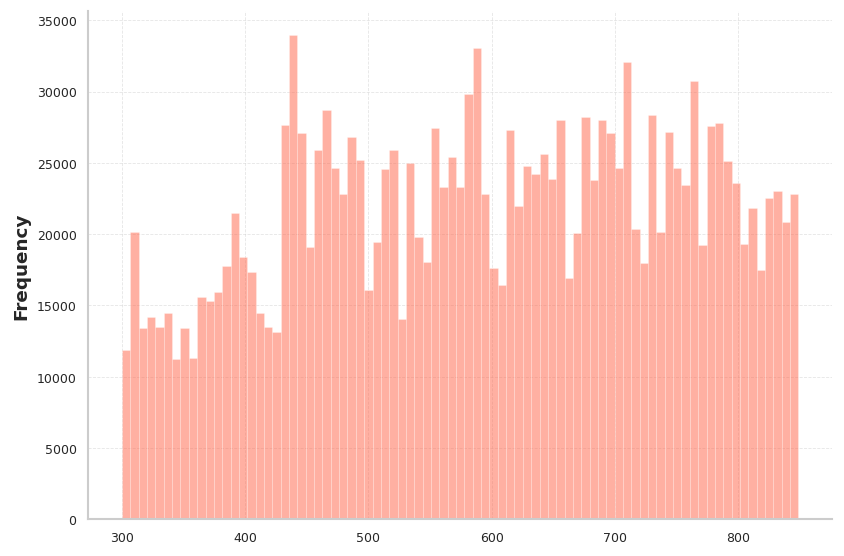

In [ ]:
df['Credit Score'].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Model Staked**

In [ ]:
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents']
numerical_cols_nocs = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

# Preprocessing for categorical features: Imputation + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder())
])

# Preprocessing for numerical features: Imputation + Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine both transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols_nocs)
    ],
    remainder='drop', # Drop any columns not specified in transformers
    verbose_feature_names_out=True)

**MODEL 1**

In [ ]:
# X_ = df[df['Credit Score'].isna()==False].copy()
# X_test = df[df['Credit Score'].isna()==True].copy()

# X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
# X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

# print(X_.shape, X_test.shape)

# RANDOM_SEED=42
# FOLDS=5

# X_test = X_test.drop(columns=['Credit Score',"Premium Amount"])
# X = X_.drop(columns=['Credit Score',"Premium Amount"])
# y = X_['Credit Score'].copy()

# cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
# rmse_fold = []

# # Initialize the Stack
# occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

# i=0

# oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

# for idx_train, idx_valid in cv.split(X, y):

#     print(f"Fold {i}")

#     # Split the data into training and validation sets for the current fold
#     X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
#     X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

#     estimators = [
#         ('lgbm', LGBMRegressor(objective="root_mean_squared_error", metric="rmse", max_depth=6,reg_alpha=0.1,reg_lambda=0.1, boosting_type='gbdt',
#                                random_state=RANDOM_SEED, n_estimators=300,subsample=0.8, colsample_bytree=0.8, learning_rate=0.05,
#                                categorical_feature=list(range(len(categorical_cols))), num_leaves=31)),
#         ('xgb', XGBRegressor(learning_rate=0.05,objective ="reg:squarederror",n_estimators=300,max_depth=7,subsample=0.80,eval_metric='rmse',
#                               colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.1,reg_alpha=0.1)),
#         ('catboost', CatBoostRegressor(iterations=300, learning_rate=0.05, depth=7, l2_leaf_reg=3, loss_function='RMSE', eval_metric='RMSE',
#                            random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
#             ]

#     meta_model = Ridge(alpha=0.1, positive=True, random_state=42)

#     # Create StackingRegressor
#     stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

#     model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                       ("model",stacking_model)])



#     # Train the model using the training set and validate using the validation set
#     if i >= 5:
#         # Fit the StackingRegressor
#         # model_pipeline[:-1].fit(X_train, y_train)
#         # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
#         # eval_set = [(X_val_, y_valid)]


#         model_pipeline.fit(X_train, y_train)
#         obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs_base_{i}.skops")

#     else:
#         unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs_base_{i}.skops")
#         model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs_base_{i}.skops", trusted=unknown_types)

#     occ_preds = model_pipeline.predict(X_valid)

#     oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

#     # Prepare the test data and make predictions
#     rmse_ = root_mean_squared_error(y_valid, occ_preds)
#     rmse_fold.append(rmse_)
#     print(f"RMSE fold {i}: {rmse_fold}")

#     X_test_ = X_test.copy()

#     # Aggregate the predictions across the 5 folds (averaging for ensemble)
#     occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
#     i += 1

#     #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
#     gc.collect()

(1770667, 20) (229333, 20)
Fold 0
RMSE fold 0: [138.29268949616505]
Fold 1
RMSE fold 1: [138.29268949616505, 138.25176980644824]
Fold 2
RMSE fold 2: [138.29268949616505, 138.25176980644824, 138.3341233341962]
Fold 3
RMSE fold 3: [138.29268949616505, 138.25176980644824, 138.3341233341962, 138.50129388447337]
Fold 4
RMSE fold 4: [138.29268949616505, 138.25176980644824, 138.3341233341962, 138.50129388447337, 138.49835471623092]


In [ ]:
# print(rmse_fold)

[138.29268949616505, 138.25176980644824, 138.3341233341962, 138.50129388447337, 138.49835471623092]


**MODEL 2**

In [ ]:
# X_ = df[df['Credit Score'].isna()==False].copy()
# X_test = df[df['Credit Score'].isna()==True].copy()

# X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
# X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

# print(X_.shape, X_test.shape)

# RANDOM_SEED=42
# FOLDS=5

# X_test = X_test.drop(columns=['Credit Score',"Premium Amount"])
# X = X_.drop(columns=['Credit Score',"Premium Amount"])
# y = X_['Credit Score'].copy()

# cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
# rmse_fold = []

# # Initialize the Stack
# occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

# i=0

# oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

# for idx_train, idx_valid in cv.split(X, y):

#     print(f"Fold {i}")

#     # Split the data into training and validation sets for the current fold
#     X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
#     X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

#     estimators = [
#         ('lgbm', LGBMRegressor(objective="root_mean_squared_error", metric="rmse", max_depth=8,reg_alpha=0.01,reg_lambda=0.01, boosting_type='gbdt',
#                                random_state=RANDOM_SEED, n_estimators=600,subsample=0.8, colsample_bytree=0.8, learning_rate=0.025,
#                                categorical_feature=list(range(len(categorical_cols))), num_leaves=41)),
#         ('xgb', XGBRegressor(learning_rate=0.025,objective ="reg:squarederror",n_estimators=600,max_depth=8,subsample=0.80,eval_metric='rmse',
#                               colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.01,reg_alpha=0.01)),
#         ('catboost', CatBoostRegressor(iterations=600, learning_rate=0.025, depth=8, l2_leaf_reg=3, loss_function='RMSE', eval_metric='RMSE',
#                            random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
#             ]

#     meta_model = Ridge(alpha=0.1, positive=True, random_state=42)

#     # Create StackingRegressor
#     stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

#     model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                       ("model",stacking_model)])



#     # Train the model using the training set and validate using the validation set
#     if i >= 5:
#         # Fit the StackingRegressor
#         # model_pipeline[:-1].fit(X_train, y_train)
#         # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
#         # eval_set = [(X_val_, y_valid)]


#         model_pipeline.fit(X_train, y_train)
#         obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs1_base_{i}.skops")

#     else:
#         unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs1_base_{i}.skops")
#         model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs1_base_{i}.skops", trusted=unknown_types)

#     occ_preds = model_pipeline.predict(X_valid)

#     oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

#     # Prepare the test data and make predictions
#     rmse_ = root_mean_squared_error(y_valid, occ_preds)
#     rmse_fold.append(rmse_)
#     print(f"RMSE fold {i}: {rmse_fold}")

#     X_test_ = X_test.copy()

#     # Aggregate the predictions across the 5 folds (averaging for ensemble)
#     occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
#     i += 1

#     #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
#     gc.collect()


(1770667, 20) (229333, 20)
Fold 0
RMSE fold 0: [138.0549266479898]
Fold 1
RMSE fold 1: [138.0549266479898, 138.00843391754094]
Fold 2
RMSE fold 2: [138.0549266479898, 138.00843391754094, 138.11138781723164]
Fold 3
RMSE fold 3: [138.0549266479898, 138.00843391754094, 138.11138781723164, 138.2673968443035]
Fold 4
RMSE fold 4: [138.0549266479898, 138.00843391754094, 138.11138781723164, 138.2673968443035, 138.2414437157873]


In [ ]:
# print(rmse_fold)

[138.0549266479898, 138.00843391754094, 138.11138781723164, 138.2673968443035, 138.2414437157873]


**MODEL 3**

In [ ]:
X_ = df[df['Credit Score'].isna()==False].copy()
X_test = df[df['Credit Score'].isna()==True].copy()

X_[X_.select_dtypes(include="object").columns] = X_[X_.select_dtypes(include="object").columns].astype('category')
X_test[X_test.select_dtypes(include="object").columns] = X_test[X_test.select_dtypes(include="object").columns].astype('category')

print(X_.shape, X_test.shape)

RANDOM_SEED=42
FOLDS=5

X_test = X_test.drop(columns=['Credit Score',"Premium Amount"])
X = X_.drop(columns=['Credit Score',"Premium Amount"])
y = X_['Credit Score'].copy()

cv = KFold(FOLDS, shuffle=True, random_state=RANDOM_SEED)
rmse_fold = []

# Initialize the Stack
occ_test_pred_stck = pd.DataFrame(index=X_test.index, columns=list(range(FOLDS)))

i=0

oof_results = pd.DataFrame(columns=["Occ_oof"], index=X.index)

for idx_train, idx_valid in cv.split(X, y):

    print(f"Fold {i}")

    # Split the data into training and validation sets for the current fold
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train].to_numpy().reshape(-1,1)
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid].to_numpy().reshape(-1,1)

    estimators = [
        ('lgbm', LGBMRegressor(objective="root_mean_squared_error", metric="rmse", max_depth=8,reg_alpha=0.1,reg_lambda=0.1, boosting_type='gbdt',
                               random_state=RANDOM_SEED, n_estimators=1000,subsample=0.8, colsample_bytree=0.8, learning_rate=0.025,
                               categorical_feature=list(range(len(categorical_cols))), num_leaves=41)),
        ('xgb', XGBRegressor(learning_rate=0.025,objective ="reg:squarederror",n_estimators=1000,max_depth=8,subsample=0.80,eval_metric='rmse',
                              colsample_bytree=0.8,enable_categorical="True",reg_lambda=0.1,reg_alpha=0.1)),
        ('catboost', CatBoostRegressor(iterations=1000, learning_rate=0.025, depth=8, l2_leaf_reg=3, loss_function='RMSE', eval_metric='RMSE',
                           random_seed=RANDOM_SEED, subsample=0.80, bootstrap_type='Bernoulli'))
            ]

    meta_model = Ridge(alpha=0.1, positive=True, random_state=42)

    # Create StackingRegressor
    stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ("model",stacking_model)])



    # Train the model using the training set and validate using the validation set
    if i >= 5:
        # Fit the StackingRegressor
        # model_pipeline[:-1].fit(X_train, y_train)
        # X_val_ = model_pipeline[:-1].transform(X_valid) # Transform X_val using the same steps as X
        # eval_set = [(X_val_, y_valid)]


        model_pipeline.fit(X_train, y_train)
        obj = sio.dump(model_pipeline, f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs2_base_{i}.skops")

    else:
        unknown_types = sio.get_untrusted_types(file=f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs2_base_{i}.skops")
        model_pipeline = sio.load(f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E12/stack_cs2_base_{i}.skops", trusted=unknown_types)

    occ_preds = model_pipeline.predict(X_valid)

    oof_results.iloc[idx_valid,:] = occ_preds.flatten().reshape(-1,1)

    # Prepare the test data and make predictions
    rmse_ = root_mean_squared_error(y_valid, occ_preds)
    rmse_fold.append(rmse_)
    print(f"RMSE fold {i}: {rmse_fold}")

    X_test_ = X_test.copy()

    # Aggregate the predictions across the 5 folds (averaging for ensemble)
    occ_test_pred_stck.loc[:,i] = model_pipeline.predict(X_test_) #[:, 0] / FOLDS
    i += 1

    #del model_pipeline, X_test_, X_train, y_train, X_valid, y_valid
    gc.collect()

Streaming output truncated to the last 5000 lines.
1:	learn: 149.1821901	total: 104ms	remaining: 51.7s
2:	learn: 148.8039365	total: 153ms	remaining: 50.8s
3:	learn: 148.4366562	total: 203ms	remaining: 50.4s
4:	learn: 148.0841387	total: 251ms	remaining: 50s
5:	learn: 147.7523795	total: 303ms	remaining: 50.3s
6:	learn: 147.4330291	total: 354ms	remaining: 50.2s
7:	learn: 147.1238090	total: 406ms	remaining: 50.3s
8:	learn: 146.8256666	total: 455ms	remaining: 50.1s
9:	learn: 146.5423514	total: 508ms	remaining: 50.3s
10:	learn: 146.2693967	total: 560ms	remaining: 50.3s
11:	learn: 146.0079177	total: 612ms	remaining: 50.4s
12:	learn: 145.7734155	total: 665ms	remaining: 50.5s
13:	learn: 145.5393197	total: 718ms	remaining: 50.6s
14:	learn: 145.3156980	total: 771ms	remaining: 50.6s
15:	learn: 145.1035550	total: 821ms	remaining: 50.5s
16:	learn: 144.9012925	total: 872ms	remaining: 50.5s
17:	learn: 144.7057815	total: 923ms	remaining: 50.4s
18:	learn: 144.5282024	total: 977ms	remaining: 50.4s
19:	le

In [ ]:
print(rmse_fold)

[137.7845744515806, 137.76001781480133, 137.83917648186454, 138.0183303301117, 137.98790681729096]


In [ ]:
occ_test_pred_stck.head()

,0,1,2,3,4
2,603.696754,607.853945,607.826654,603.536183,600.834126
12,585.982732,590.844303,594.279609,593.130349,595.601585
16,582.256834,581.718874,581.13326,591.209901,584.052668
18,643.474905,640.90598,643.542816,641.981594,644.024414
31,531.935338,536.427541,535.735689,537.542999,535.452988


In [ ]:
occ_test_pred_stck['Credit Score'] = occ_test_pred_stck.mean(axis=1).astype(float)

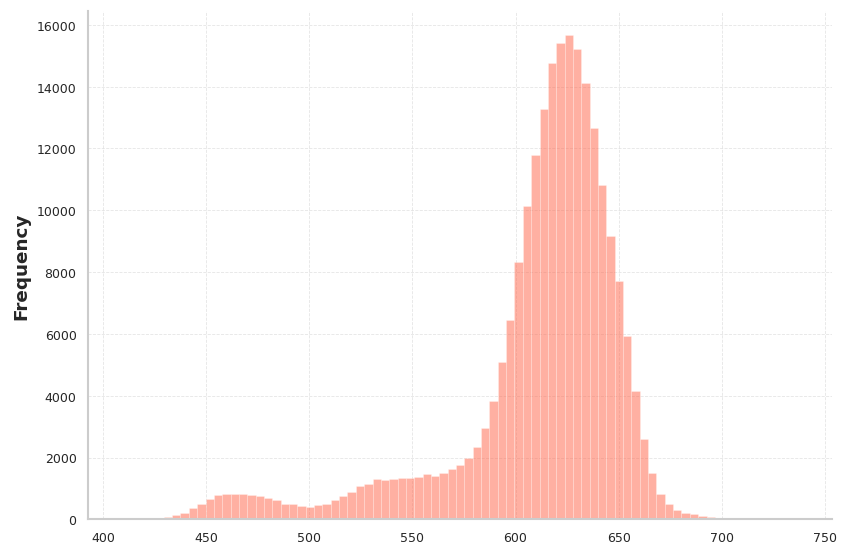

In [ ]:
occ_test_pred_stck['Credit Score'].plot(kind="hist", bins=81, color="tomato", alpha=0.5)
plt.show()

#### **Replace Values**

In [ ]:
occ_test_pred_stck

,0,1,2,3,4,Credit Score
2,603.696754,607.853945,607.826654,603.536183,600.834126,604.749532
12,585.982732,590.844303,594.279609,593.130349,595.601585,591.967716
16,582.256834,581.718874,581.13326,591.209901,584.052668,584.074307
18,643.474905,640.90598,643.542816,641.981594,644.024414,642.785942
31,531.935338,536.427541,535.735689,537.542999,535.452988,535.418911
...,...,...,...,...,...,...
1999988,626.266616,633.951886,628.358138,627.292806,618.149291,626.803747
1999990,615.643247,614.007774,617.462186,617.61101,610.732595,615.091362
1999996,598.308841,597.008454,600.503372,600.938719,605.469518,600.445781
1999997,604.083709,619.039585,614.180721,612.165946,606.812073,611.256407


In [ ]:
df.loc[df['Credit Score'].isna()==True,'Credit Score']=occ_test_pred_stck["Credit Score"].values
df[df['Credit Score'].isna()==True]['Credit Score']

,Credit Score


In [ ]:
#df.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_cs.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/df_na_step_cs.csv")

categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Number of Dependents']
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Previous Claims', 'Policy Start Date']

df[numerical_cols] = df[numerical_cols].astype(float)
df[categorical_cols] = df[categorical_cols].astype("category")

In [ ]:
df.isna().sum()/df.shape[0]

,0
Age,0.000000
Gender,0.000000
Annual Income,0.000000
Marital Status,0.000000
Number of Dependents,0.000000
Education Level,0.000000
Occupation,0.000000
Health Score,0.000000
Location,0.000000
Policy Type,0.000000


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


## Final NaN Filling:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Age                   float64 
 1   Gender                category
 2   Annual Income         float64 
 3   Marital Status        category
 4   Number of Dependents  category
 5   Education Level       category
 6   Occupation            category
 7   Health Score          float64 
 8   Location              category
 9   Policy Type           category
 10  Previous Claims       float64 
 11  Vehicle Age           float64 
 12  Credit Score          float64 
 13  Insurance Duration    float64 
 14  Policy Start Date     float64 
 15  Customer Feedback     category
 16  Smoking Status        category
 17  Exercise Frequency    category
 18  Property Type         category
 19  Premium Amount        float64 
dtypes: category(11), float64(9)
memory usage: 158.3 MB


In [ ]:
df[(df["Insurance Duration"].isna()==True)|(df["Vehicle Age"].isna()==True)]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
15629,25.0,Female,638.000000,0.0,3.0,PhD,0.0,13.494674,Suburban,Comprehensive,2.0,NaN,467.0,6.0,2.465223,2.0,Yes,Daily,Condo,909.0
53843,36.0,Male,7735.000000,1.0,3.0,PhD,0.0,10.592719,Suburban,Basic,0.0,NaN,534.0,2.0,0.328237,0.0,No,Rarely,Condo,461.0
134847,52.0,Male,20287.000000,0.0,4.0,High School,2.0,4.788881,Suburban,Premium,0.0,NaN,406.0,6.0,1.141935,1.0,No,Daily,House,2719.0
412847,32.0,Male,1035.000000,2.0,1.0,PhD,0.0,17.491565,Urban,Comprehensive,2.0,NaN,733.0,3.0,4.621387,0.0,Yes,Rarely,House,508.0
595207,58.0,Female,29313.642042,1.0,2.0,Bachelor's,1.0,34.596578,Urban,Comprehensive,3.0,NaN,311.0,5.0,2.714538,2.0,Yes,Monthly,Condo,1628.0
711358,64.0,Male,30206.000000,1.0,3.0,Master's,0.0,49.551038,Suburban,Basic,0.0,18.0,581.0,NaN,2.670703,2.0,Yes,Rarely,Apartment,1044.0
1068825,61.0,Male,45279.000000,2.0,1.0,PhD,0.0,15.268620,Suburban,Basic,1.0,NaN,622.0,1.0,4.736456,2.0,Yes,Rarely,Condo,962.0
1517121,45.0,Male,37156.000000,2.0,0.0,Bachelor's,1.0,33.430437,Suburban,Premium,0.0,NaN,482.0,2.0,2.289881,1.0,No,Weekly,Apartment,NaN
1827445,53.0,Male,5933.000000,1.0,3.0,Master's,0.0,25.162516,Rural,Basic,0.0,0.0,673.0,NaN,1.821387,2.0,No,Weekly,House,NaN
1864839,50.0,Female,24619.000000,1.0,4.0,Master's,2.0,49.647543,Urban,Comprehensive,0.0,NaN,534.0,2.0,3.415908,1.0,No,Daily,House,NaN


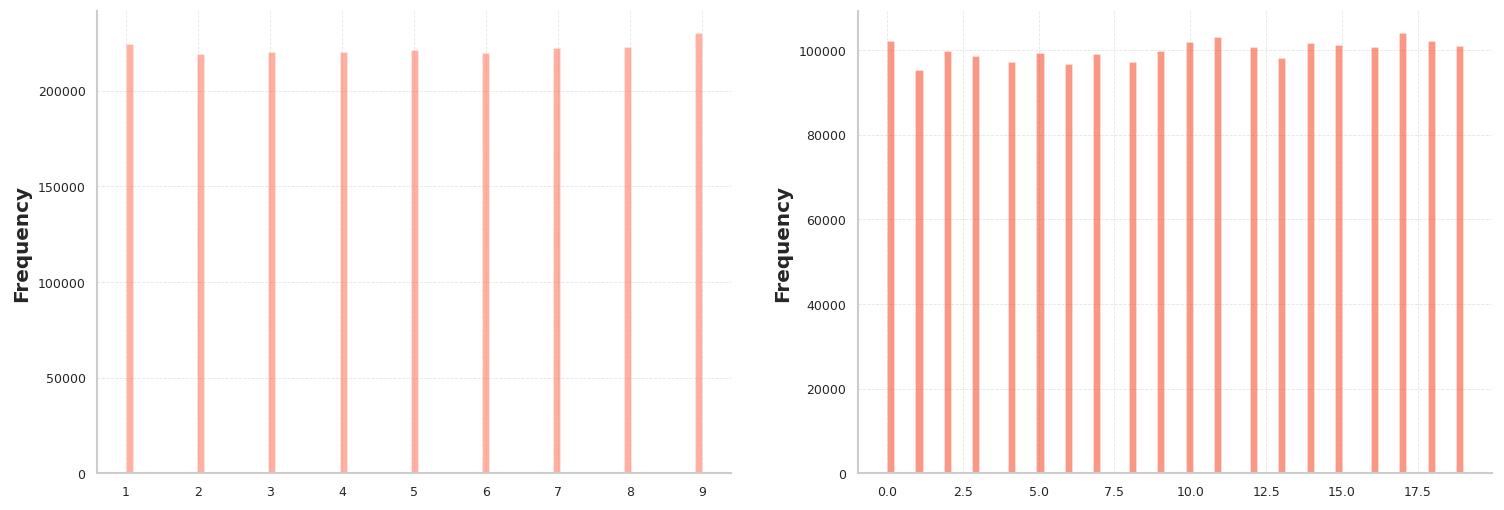

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
df['Insurance Duration'].plot(kind="hist", bins=81, color="tomato", alpha=0.5,ax=axs[0])
df['Vehicle Age'].plot(kind="hist", bins=81, color="#f4320c", alpha=0.5,ax=axs[1])
plt.show()

In [ ]:
df["Insurance Duration"] = df["Insurance Duration"].fillna(df['Insurance Duration'].mode()[0])
df["Vehicle Age"] = df["Vehicle Age"].fillna(df["Vehicle Age"].median())

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [ ]:
df["Credit Score"] = np.round(df["Credit Score"]).values
df["Annual Income"] = np.round(df["Annual Income"]).values

In [ ]:
train = df[df["Premium Amount"].isna()==False]
test = df[df["Premium Amount"].isna()==True]

print(train.shape, test.shape)

(1200000, 20) (800000, 20)


In [ ]:
train.tail(20)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1199980,48.0,Female,83965.0,1.0,3.0,High School,0.0,44.838448,Urban,Basic,0.0,9.0,326.0,1.0,1.610429,0.0,Yes,Weekly,Condo,526.0
1199981,20.0,Female,23685.0,2.0,1.0,High School,1.0,15.173435,Suburban,Basic,0.0,14.0,441.0,8.0,1.585771,0.0,No,Weekly,House,101.0
1199982,51.0,Male,6011.0,2.0,4.0,Master's,2.0,41.662597,Suburban,Comprehensive,1.0,16.0,547.0,9.0,2.092620,0.0,Yes,Monthly,House,563.0
1199983,43.0,Female,4518.0,0.0,0.0,High School,1.0,19.145097,Suburban,Premium,3.0,12.0,489.0,4.0,2.314538,2.0,No,Weekly,Condo,573.0
1199984,20.0,Female,16582.0,0.0,2.0,Master's,0.0,39.756904,Rural,Comprehensive,1.0,8.0,633.0,3.0,4.714538,2.0,No,Daily,Apartment,524.0
1199985,45.0,Male,39724.0,1.0,0.0,Bachelor's,0.0,29.457817,Suburban,Basic,1.0,13.0,519.0,4.0,4.021387,0.0,No,Monthly,House,563.0
1199986,19.0,Male,1098.0,0.0,4.0,High School,0.0,13.097153,Suburban,Comprehensive,1.0,17.0,551.0,3.0,5.281661,0.0,No,Weekly,Condo,2760.0
1199987,25.0,Female,4089.0,2.0,1.0,Bachelor's,2.0,12.335586,Urban,Basic,0.0,17.0,557.0,1.0,2.013168,0.0,Yes,Monthly,House,473.0
1199988,40.0,Female,5711.0,0.0,4.0,Master's,0.0,47.096909,Rural,Basic,2.0,4.0,710.0,3.0,1.758374,1.0,Yes,Rarely,Apartment,1542.0
1199989,18.0,Female,29092.0,2.0,2.0,High School,0.0,24.000000,Rural,Premium,0.0,14.0,624.0,1.0,1.725497,2.0,Yes,Rarely,Apartment,543.0


In [ ]:
train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/train_no_nan.csv", index=False)
test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/test_no_nan.csv", index=False)